In [1]:
import pandas as pd
import numpy as np
train_data  = pd.read_csv('handwritten_digits.csv',header=None)


index = list(range(0,400))
X = train_data.as_matrix(index);
y = train_data[400];

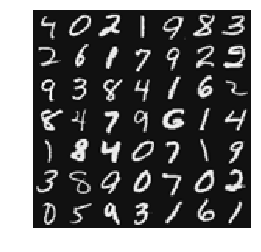

In [3]:
from matplotlib import pyplot as plt
def displayData(X,row=None,col=None):
    m,n=X.shape
    w = h = int(np.sqrt(n))
    if row==None or col == None:
        row = col = int(np.sqrt(m))
    data = []
    index = 0
    for r in range(0,row):
        rows = []
        for c in range(0,col):
            rows.append(np.reshape(X[index,:],(w,h),order='F'))
            index = index + 1
        data.append(rows)
    
    rows = []
    for r in range(0,row):
        t = np.concatenate(tuple(data[r]),axis=1);
        rows.append(t);
    
    c = np.concatenate(tuple(rows));
    plt.imshow(c,cmap="gray")
    plt.axis('off')
    plt.show();
        
m,n=X.shape
rand_indice = np.random.permutation(m)
displayData(X[rand_indice[:49]]);

In [13]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(25,), random_state=1);
clf = model.fit(X,y)
print("Training Set Accuracy: ",clf.score(X,y))

Training Set Accuracy:  1.0


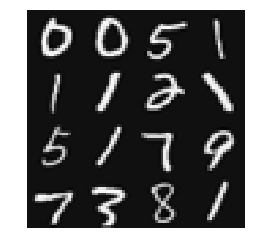

[[10 10  5  1]
 [ 1  1  2  5]
 [ 5  1  7  9]
 [ 7  9  8  1]]


In [12]:
m,n=X.shape
rand_indice = np.random.permutation(m)
row=4
col=4
test_train = X[rand_indice[:row*col]]
displayData(test_train,row,col)
print(np.reshape(clf.predict(test_train),(row,col)))